# Introduction

This is a step-by-step tutorial to demonstrate the effect of monotonic constraints on a gradient boosting estimator. Gradient boosting is a popular machine learning technique used for regression and classification tasks. In this tutorial, we will build an artificial dataset and use a gradient boosting estimator to demonstrate the effect of monotonic constraints on the model's predictions.

# Import Libraries

We will start by importing the necessary libraries required for this tutorial.

In [1]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.inspection import PartialDependenceDisplay
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Generate Data

We will generate an artificial dataset where the target value is positively correlated with the first feature and negatively correlated with the second feature. We will also add some random noise to make the data more realistic.

In [2]:
rng = np.random.RandomState(0)

n_samples = 1000
f_0 = rng.rand(n_samples)
f_1 = rng.rand(n_samples)
X = np.c_[f_0, f_1]
noise = rng.normal(loc=0.0, scale=0.01, size=n_samples)

y = 5 * f_0 + np.sin(10 * np.pi * f_0) - 5 * f_1 - np.cos(10 * np.pi * f_1) + noise

# Fit a Model Without Constraints

We will fit a model on the generated data without any constraints to see how the model performs without any restrictions.

In [3]:
gbdt_no_cst = HistGradientBoostingRegressor()
gbdt_no_cst.fit(X, y)

HistGradientBoostingRegressor()

# Fit a Model With Monotonic Constraints

We will now fit another model on the same data but with monotonic constraints on the features. We will impose a monotonic increase constraint on the first feature and a monotonic decrease constraint on the second feature.

In [5]:
gbdt_with_monotonic_cst = HistGradientBoostingRegressor(monotonic_cst=[1, -1])
gbdt_with_monotonic_cst.fit(X, y)

HistGradientBoostingRegressor(monotonic_cst=[1, -1])

# Display Partial Dependence

We will now display the partial dependence of the predictions on the two features for both the models.

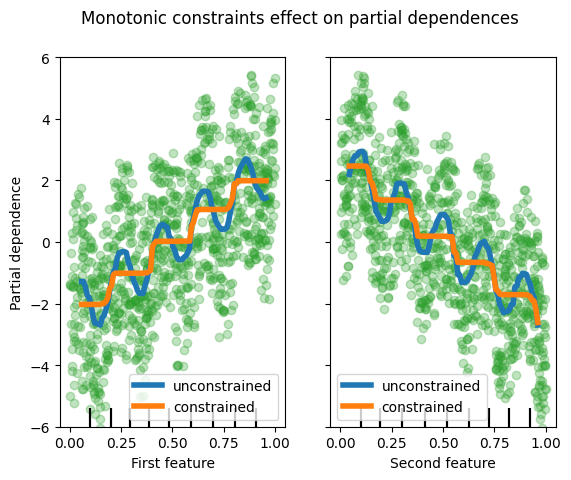

In [6]:
fig, ax = plt.subplots()
disp = PartialDependenceDisplay.from_estimator(
    gbdt_no_cst,
    X,
    features=[0, 1],
    feature_names=(
        "First feature",
        "Second feature",
    ),
    line_kw={"linewidth": 4, "label": "unconstrained", "color": "tab:blue"},
    ax=ax,
)
PartialDependenceDisplay.from_estimator(
    gbdt_with_monotonic_cst,
    X,
    features=[0, 1],
    line_kw={"linewidth": 4, "label": "constrained", "color": "tab:orange"},
    ax=disp.axes_,
)

for f_idx in (0, 1):
    disp.axes_[0, f_idx].plot(
        X[:, f_idx], y, "o", alpha=0.3, zorder=-1, color="tab:green"
    )
    disp.axes_[0, f_idx].set_ylim(-6, 6)

plt.legend()
fig.suptitle("Monotonic constraints effect on partial dependences")
plt.show()

# Using Feature Names to Specify Monotonic Constraints

If the training data has feature names, it's possible to specify the monotonic constraints by passing a dictionary. We will now demonstrate this by using the same data and specifying the constraints using feature names.

In [7]:
X_df = pd.DataFrame(X, columns=["f_0", "f_1"])

gbdt_with_monotonic_cst_df = HistGradientBoostingRegressor(
    monotonic_cst={"f_0": 1, "f_1": -1}
).fit(X_df, y)

np.allclose(
    gbdt_with_monotonic_cst_df.predict(X_df), gbdt_with_monotonic_cst.predict(X)
)

True

# Summary

In this tutorial, we demonstrated the effect of monotonic constraints on a gradient boosting estimator. We generated an artificial dataset, fitted two models, one without any constraints and the other with monotonic constraints, and displayed the partial dependence of the predictions on the two features. We also demonstrated how to specify the monotonic constraints using feature names.